# <p style="text-align:center;">**AIRBNB BANGKOK ANALYSIS**</p>



<p align="center"><img src = https://akcdn.detik.net.id/community/media/visual/2021/08/26/logo-airbnb_169.jpeg?w=700&q=90>

---

# Latar Belakang

Airbnb adalah sebuah perusahaan asal Amerika yang telah tersebar diseluruh dunia yang mengoperasikan pasar online untuk homestay dan pengalaman jangka pendek dan jangka panjang.
Saat ini mereka sedang melakukan evaluasi terkait bagaimana prospek hotel di Bangkok dan sasaran pasar yang layak untuk ditingkatkan.

## Pernyataan Masalah

Berdasarkan report yang dikeluarkan oleh *Travel Weekly ASIA* dan *Bangkok Post*, Bangkok saat ini sedang menghadapi 2 masalah utama khususnya dalam dunia perhotelan yaitu [***Oversupply***](https://www.travelweekly-asia.com/Travel-News/Hotel-News/Tempered-expectations-Thailand-may-face-hotel-oversupply) dan [***Unable to Improve Room Rates***](https://www.bangkokpost.com/business/general/2666158/hotels-unable-to-improve-room-rates) , tapi disaat bersamaan berdasarkan report yang dikeluarkan oleh [*JLL*](https://realestateasia.com/commercial-hotel/news/bangkok-add-over-3000-new-keys-its-hotel-supply-year-end) Bangkok sedang berada dalam fase recovery pasca pandemi.

Berkaca dari report yang dikeluarkan oleh institusi-institusi tersebut Airbnb ingin mengetahui bagaimana sebenarnya kondisi hotel di Bangkok, apakah sudah sampai pada tahap Oversupply dan kategori hotel seprti apa yang masih dapat terserap dengan cukup baik oleh pasar. Informasi ini akan memudahkan Airbnb dalam menentukan strategi pemasaran, pembukaan hotel baru atau strategi untuk bisa melakukan improve room rates.



***Key Question :***
1. Seperti apakah tipe wisatawan yang mengunjungi Bangkok berdasarkan budget penginapan dan tujuan perjalanan?
2. Apakah kondisi penginapan di Bangkok saat ini sudah mencapai fase Oversupply?
3. Apakah memungkinkan untuk menaikan room rates?

***Assumption and Limiting Conditions :***
1. Analyst meyakini bahwa data yang ada di dataset ini adalah valid sehingga analyst tidak melakukan verifikasi ulang terhadap data.
2. Asumsi untuk setiap pengunjung hanya dapat memberikan 1 kali review, sehingga setiap review akan dianggap sebagai 1 orang.
3. Analisa popularitas dari total review hanya menggambarkan seberapa populer tanpa mempertimbangkan apakah itu berupa sentimen positif atau negatif
4. Untuk setiap angka yang kurang dari 365 pada kolom `availability_365` akan dianggap telah dibooking oleh tamu, sehingga kemungkinan bahwa itu bahwa penginapan tersebut dipakai pribadi oleh owner ditiadakan pada analisa ini.
5. Asumsi mata uang yang digunakan adalah **Baht Thailand (฿)**

# Data

Untuk menjawab pertanyaan di atas, kita akan menganalisa dataset Airbnb yang berisi informasi listing hotel yang ada di Bangkok. 

In [1]:
pip install missingno folium geopandas pyshp

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind, kruskal
import seaborn as sns
import missingno as msno

import folium
from googletrans import Translator
from folium import plugins
import geopandas as gpd
import shapefile
from shapely.geometry import Polygon
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

Berikut adalah deskripsi utnuk setiap kolom dalam tabel pada dataset Airbnb:

| Kolom                                 | Deskripsi                                                                                                                                                                                                                                                                                                          |
|---------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| id                                    | Airbnb's unique identifier for the listing.                                                                                                                                                                                                                                                                       |
| name                                  | Name of the listing.                                                                                                                                                                                                                                                                                               |
| host_id                               | Airbnb's unique identifier for the host/user.                                                                                                                                                                                                                                                                      |
| host_name                             | Name of the host. Usually, just the first name(s).                                                                                                                                                                                                                                                                 |
| neighborhood                          | The neighborhood is geocoded using the latitude and longitude against neighborhoods as defined by open or public digital shapefiles.                                                                                                                                                                               |
| latitude                              | Uses the World Geodetic System (WGS84) projection for latitude and longitude.                                                                                                                                                                                                                                      |
| longitude                             | Uses the World Geodetic System (WGS84) projection for latitude and longitude.                                                                                                                                                                                                                                      |
| room_type                             | Type of room available: Entire home/apt, Private room, Shared room, or Hotel.                                                                                                                                                                                                                                      |
| price                                 | Daily price in local currency. Note, the $ sign may be used despite the locale.                                                                                                                                                                                                                                   |
| minimum_nights                       | The minimum number of night stays for the listing (calendar rules may differ).                                                                                                                                                                                                                                    |
| number_of_reviews                    | The number of reviews the listing has.                                                                                                                                                                                                                                                                             |
| last_review                          | The date of the last/newest review.                                                                                                                                                                                                                                                                               |
| calculated_host_listings_count       | The number of listings the host has in the current scrape in the city/region geography.                                                                                                                                                                                                                            |
| availability_365                     | The calendar determines the availability of the listing x days in the future. Note a listing may be available because it has been booked by a guest or blocked by the host.                                                                                                                                     |
| number_of_reviews_ltm                | The number of reviews the listing has (in the last 12 months).                                                                                                                                                                                                                                                    |

Berikut 5 baris teratas dan terbawah dari dataset Airbnb

In [3]:
air_bnb =  pd.read_csv('Airbnb Listings Bangkok.csv')
display(air_bnb.head(),air_bnb.tail())

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
15849,15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0
15853,15853,790476492384199044,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.752960,100.540820,Private room,1214,1,0,NaN,NaN,14,365,0


Setelah melihat dataset tersebut, kita ingin mengetahui estimasi kapan dataset ini dibuat dengan cara melihat tanggal termuda dari kolom `last_review`

In [4]:
air_bnb['last_review'] = pd.to_datetime(air_bnb['last_review'], errors='coerce')

latest_review_date = air_bnb['last_review'].max()
print("Tanggal termuda dari kolom 'Last Review':", latest_review_date)

Tanggal termuda dari kolom 'Last Review': 2022-12-28 00:00:00


In [5]:
air_bnb['last_review'] = pd.to_datetime(air_bnb['last_review'], errors='coerce')

latest_review_date = air_bnb['last_review'].min()
print("Tanggal termuda dari kolom 'Last Review':", latest_review_date)

Tanggal termuda dari kolom 'Last Review': 2012-12-15 00:00:00


Berdasarkan hasil pengecekan tersebut dapat kita asumsikan bahwa dataset Airbnb adalah valid per tanggal **28 Desember 2022**

## Data Understanding dan  Data Cleaning

Disini kita perlu melakukan penanganan/handling terhadap missing value dan data anomali, serta memahami apa isight yang dapat diambil dari data

Kita melihat jumlah dan jenis data dari tiap kolom :

In [6]:
print(f'Jumlah baris dan kolom di dataset Airbnb adalah {air_bnb.shape}')
air_bnb.info()

Jumlah baris dan kolom di dataset Airbnb adalah (15854, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Unnamed: 0                      15854 non-null  int64         
 1   id                              15854 non-null  int64         
 2   name                            15846 non-null  object        
 3   host_id                         15854 non-null  int64         
 4   host_name                       15853 non-null  object        
 5   neighbourhood                   15854 non-null  object        
 6   latitude                        15854 non-null  float64       
 7   longitude                       15854 non-null  float64       
 8   room_type                       15854 non-null  object        
 9   price                           15854 non-null  int64         
 10  minimum_ni

Kita dapat melihat dari informasi awal terkait dataset Airbnb :
- Dataset terdiri dari 15.854 Baris dan 17 Kolom
- Terdapat 3 kolom dengan tipe float64, 9 kolom dengan tipe int64 dan 5 kolom yang bertipe object
- 4 kolom yang memiliki missing value yaitu :
    - name
    - host_name
    - last_review
    - reviews_per_month

Kita akan melihat statistika deskriptif dari dataset Airbnb :

In [7]:
display(air_bnb.describe(),air_bnb.describe(include=object))

,Unnamed: 0,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,15854.000000,1.585400e+04,1.585400e+04,15854.000000,15854.000000,1.585400e+04,15854.000000,15854.000000,10064,10064.000000,15854.000000,15854.000000,15854.000000
mean,7926.500000,1.579397e+17,1.541058e+08,13.745144,100.559903,3.217704e+03,15.292355,16.654157,2021-08-30 08:37:49.316375296,0.813145,13.889618,244.378643,3.481519
min,0.000000,2.793400e+04,5.892000e+04,13.527300,100.329550,0.000000e+00,1.000000,0.000000,2012-12-15 00:00:00,0.010000,1.000000,0.000000,0.000000
25%,3963.250000,2.104509e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,2020-02-20 00:00:00,0.120000,1.000000,138.000000,0.000000
50%,7926.500000,3.503734e+07,1.224556e+08,13.738490,100.561415,1.429000e+03,1.000000,2.000000,2022-10-24 00:00:00,0.435000,4.000000,309.000000,0.000000
75%,11889.750000,5.256154e+07,2.390547e+08,13.759497,100.585150,2.429000e+03,7.000000,13.000000,2022-12-08 00:00:00,1.060000,13.000000,360.000000,3.000000
max,15853.000000,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,2022-12-28 00:00:00,19.130000,228.000000,365.000000,325.000000
std,4576.799919,2.946015e+17,1.318726e+08,0.043040,0.050911,2.497212e+04,50.815020,40.613331,NaN,1.090196,30.269848,125.843224,8.916937


,name,host_name,neighbourhood,room_type
count,15846,15853,15854,15854
unique,14794,5312,50,4
top,New! La Chada Night Market studio 2PPL near MRT,Curry,Vadhana,Entire home/apt
freq,45,228,2153,8912


Dari descriptive statistic diatas kita dapat mengetahui mean, standar deviasi, Q1, Q2, Q3, nilai minimum dan maximum, modus dan jumlah nilai unik dari tiap kolom.

Kita juga bisa melihat nilai unik untuk tiap kolom seperti dibawah ini :

In [8]:
pd.set_option('display.max_colwidth', None)

listItem = []
for col in air_bnb.columns :
    listItem.append( [col, air_bnb[col].nunique(), air_bnb[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Unnamed: 0,15854,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]"
1,id,15854,"[27934, 27979, 28745, 35780, 941865, 1704776, 48736, 1738669, 1744248, 952677, 55681, 1765918, 55686, 59221, 959254, 62217, 1791481, 66046, 105042, 1793000, 960858, 113744, 965722, 1808600, 118118, 1816517, 969792, 121410, 145343, 973830, 156583, 1823321, 159854, 976690, 978531, 166267, 169285, 978969, 1842066, 169514, 1849029, 1862089, 985743, 988373, 172332, 1016487, 1862331, 1862377, 185364, 1887544, 1888303, 1019241, 241416, 1026451, 1028469, 1028486, 1035589, 1035640, 1897982, 296960, 1898332, 1041976, 313459, 1052180, 1926489, 320014, 1933894, 1057173, 1060320, 384924, 1067748, 1077493, 1943048, 385130, 385278, 385979, 390611, 1947314, 1079039, 1086843, 393066, 397449, 405662, 1088343, 1094136, 1961981, 407381, 1975849, 1133843, 413824, 428360, 428421, 428907, 428950, 430691, 430703, 430706, 432004, 439051, 1138679, ...]"
2,name,14794,"[Nice room with superb city view, Easy going landlord,easy place, modern-style apartment in Bangkok, Spacious one bedroom at The Kris Condo Bldg. 3, Suite Room 3 at MetroPoint, NEw Pro!! Bungalow Bkk Centre, Condo with Chaopraya River View, 1 chic bedroom apartment in BKK, Batcave, Pool view, near Chatuchak, Standard Room Decor do Hostel, Sathorn Terrace Apartment(61), 2BR apt in a cozy neighborhood, Comfy bedroom near River pier & BTS Taksin., budget hotel bangkok near subway, Deluxe Condo, Nana, Pool/GYM/Sauna, Luxury@swimpool/FreeWiFi/nearJJMkt, Nice and Quiet condo near BTS Onnut, 24Flr- 1br Apt near JJ, MRT, BTS, Central Bangkok 3 Bedroom Apartment, The Duplex - Asoke- Luxury 92sqm, New, Stylish & Luxury Studio Condo, River View - Ivy Condo (1 Bedroom), Siamese Gioia on Sukhumvit 31, Contemporary Modern Duplex-Thong Lo, Pan Dao Condo 5 min from BTS On Nut, 1 BR condominium center BKK +NETFLIX+55SQM, 1 penthouse in central Bangkok, MetroPoint Suite Room, Near Airport, Boutique Rooms Near Bangkok Airport, BangLuang House1 @ Bangkok Thailand, Studio near Chula University/Silom walk to MRT/BTS, กรองทองแมนชั่น (ลาดพร้าว 81), Deluxe one Bedroom Condo w.Pool-GYM & Sauna 8-7, Beautiful 1 BR apartment @BTS Ari, Urban Oasis in the heart of Bangkok, 1Bed apt. near Chula University/Silom, Stay at the ROARING RATCHADA!, 60 m2 apartment in Thong Lor, Bangkok, ICONSIAM River view on 49th floor, 2br apt in Sukhumvit Asoke near BTS, Self catering cozy1-bed near BTS, ❂☀☀☀Perfect Escape☀☀☀Sunny Roof EnSuite☀☀☀☀, Room with city view of BKK, BangLuang House 2@ Bangkok Thailand, Tranquility found in busy Bangkok near new skytran, Private room in Bangkok, ☞✪✪✪✪Roomy Studio 4 Family r friends✪No Stairs✪✪✪✪, ☞Downtown Central Studio-Bangkok MRT, Beautiful Wood Bangkok Resort House, ""Serviced 2 Bed Scenic SkyVillas"", Cozy 1BR rooftop (BTS Ploenchit) heart of bangkok, Chic two bedroom for Monthly rental, Sukhumvit52 near SkyTrain to BkkCBD, ♡Chic Studio, Easy Walk to Pier & BTS Taksin♡, One Bedroom Suite- WIFI- SATHORN, STUDIO RM2 - WIFI- SATHORN, Quiet Double Bed Apartment, Quiet Double Bed Apartment, Suvarnabhumi free transfer, Luxury&Comfy wthWifi walk-distance to Subwy-Malls, Apr. for rent full fur 1 bedroom, monthly, Long-stay special rate spacious entire floor Siam, One Bed Room at Sukumvit 50 Bangkok, City View, relaxed theme & delicious food around, Ideo Blucove Sukhumvit Bangkok, 2-BR condo near BTS on Sukhumvit Rd, NewlyRenovated! 3Br,SingleHouse, Park/BTS/Airport., IdeoMix, Sukhumvit RD, close to BTS, Mix Dorm Decor do Hostel, Oasis in the heart of Bangkok, 5 mins by car from Chong Nonsi BTS Station, Inn Saladaeng - Superior hotel roo

### **Handling Missing Value**

Setelah kita mengetahui deskriptif statistik dan jenis data yang ada dalam tiap kolom pada dataset, sekarang kita akan melihat missing value yang ada pada dataset

In [9]:
air_bnb.isna().sum()

Unnamed: 0                           0
id                                   0
name                                 8
host_id                              0
host_name                            1
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

In [10]:
air_bnb.isna().sum()/air_bnb.shape[0]*100

Unnamed: 0                         0.000000
id                                 0.000000
name                               0.050460
host_id                            0.000000
host_name                          0.006308
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       36.520752
reviews_per_month                 36.520752
calculated_host_listings_count     0.000000
availability_365                   0.000000
number_of_reviews_ltm              0.000000
dtype: float64

<Axes: >

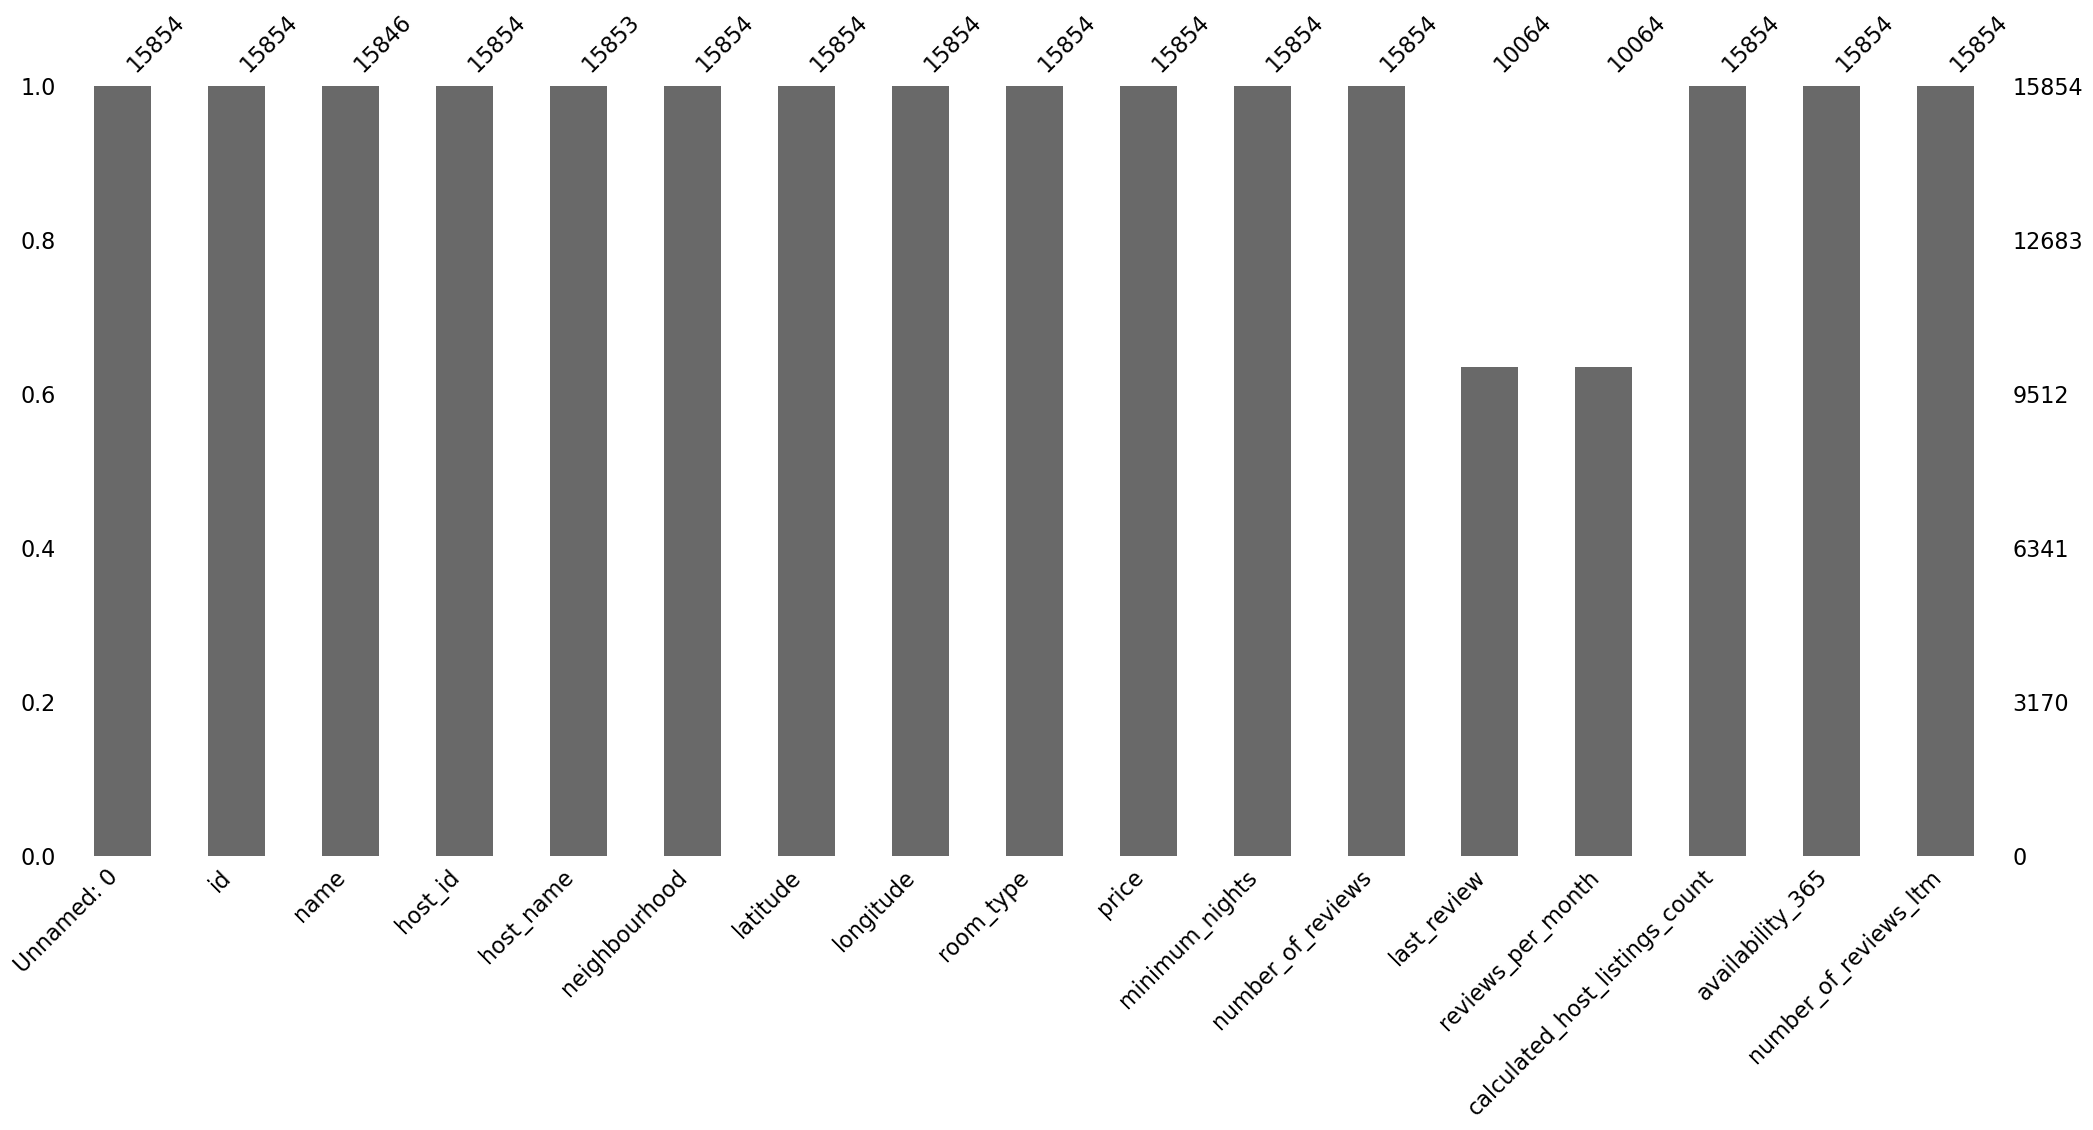

In [11]:
msno.bar(air_bnb)

Dari hasil pengecekan diatas kita dapat mengetahui bahwa terdapat 4 kolom yang mengandung missing value, yaitu :

| Column Name| Persentase Missing| Number of Missing Data
|---------------------------------------|------------------------|------------------------|
| name | 0,05%|  8
| host_name| 0,006%| 1
| last_review| 36,52%| 5.790
| reviews_per_month| 36,52%|5.790

Disini kita bisa melihat bahwa persentase missing dan row missing pada last_review dan reviews_per_month memiliki jumlah yang sama, sehingga ada kecurigaan bahwa kedua kolom ini saling berhubungan, kita akan mencoba melihat persebaran missing value dari 2 kolom tersebut.


<Axes: >

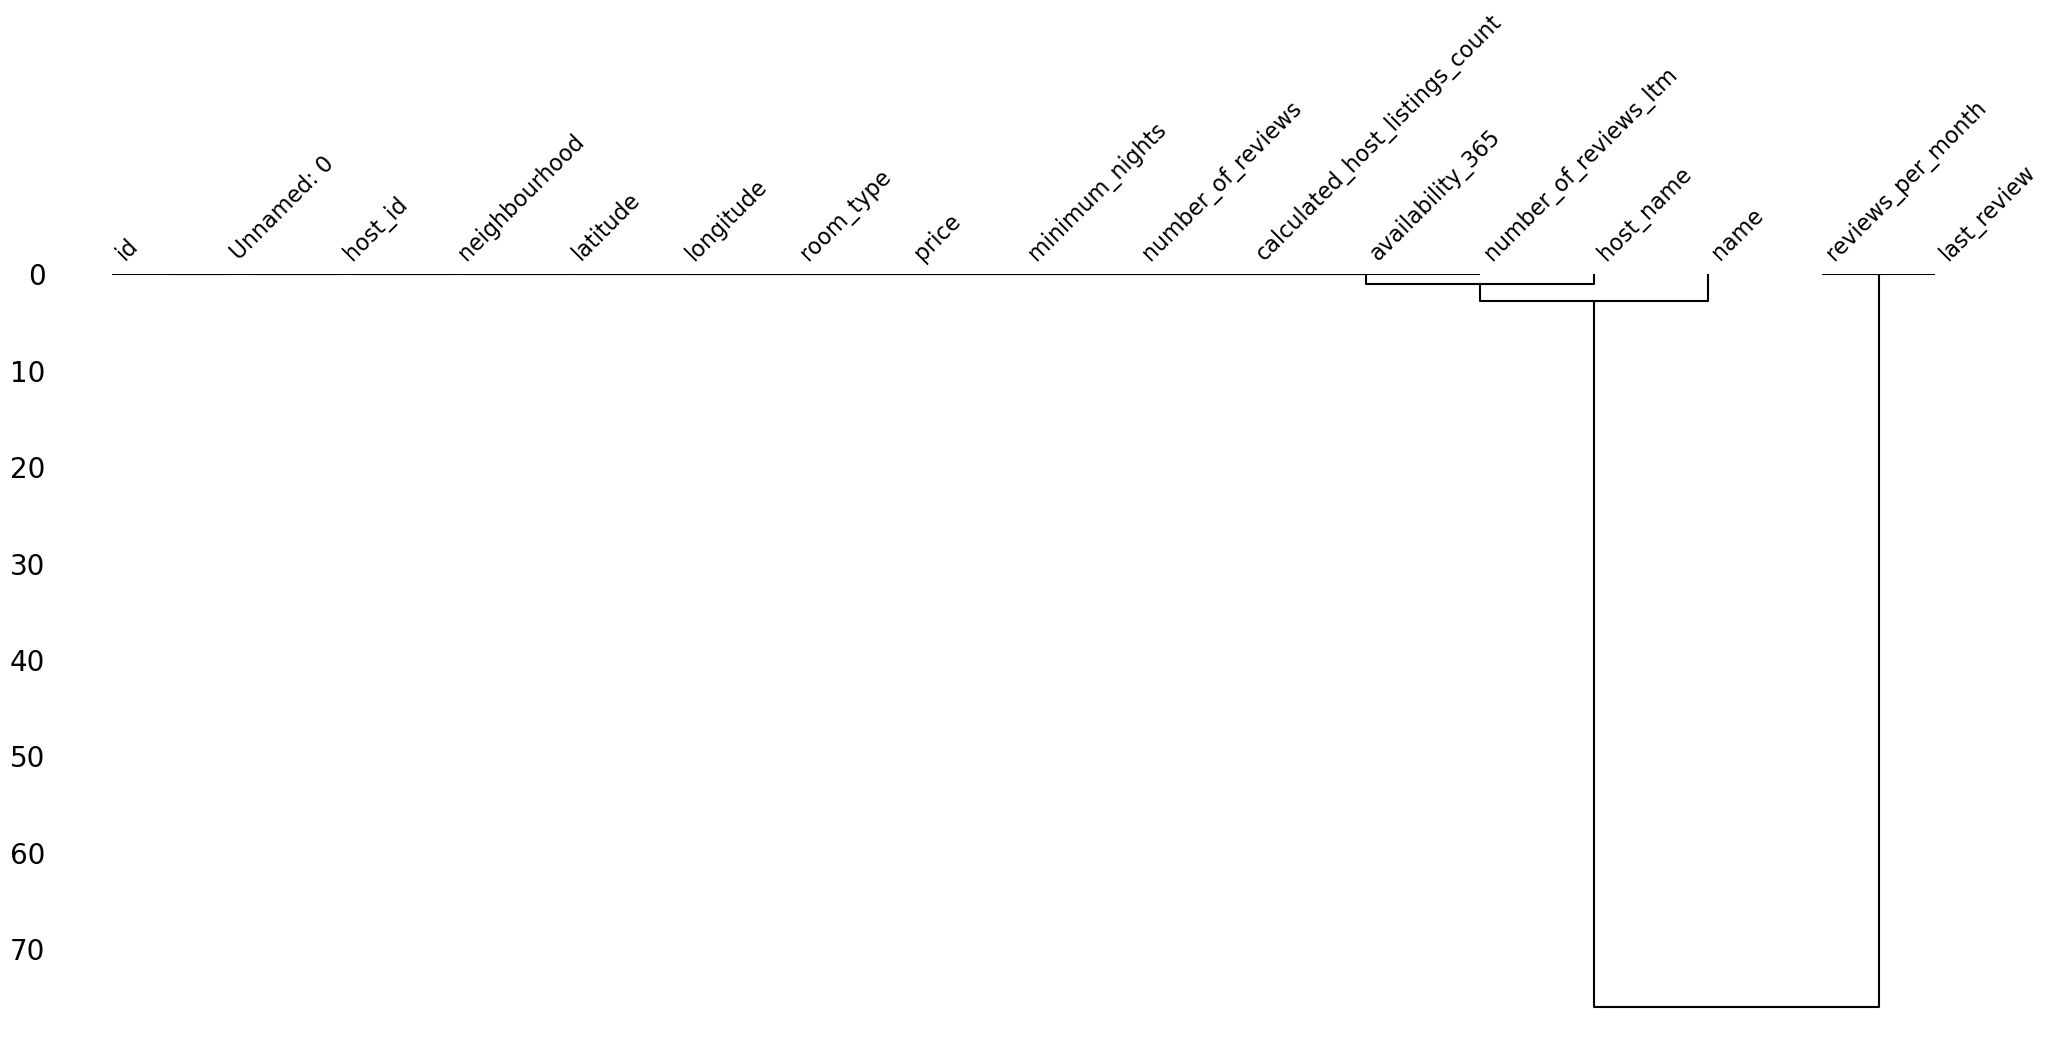

In [12]:
msno.dendrogram(air_bnb)

<Axes: >

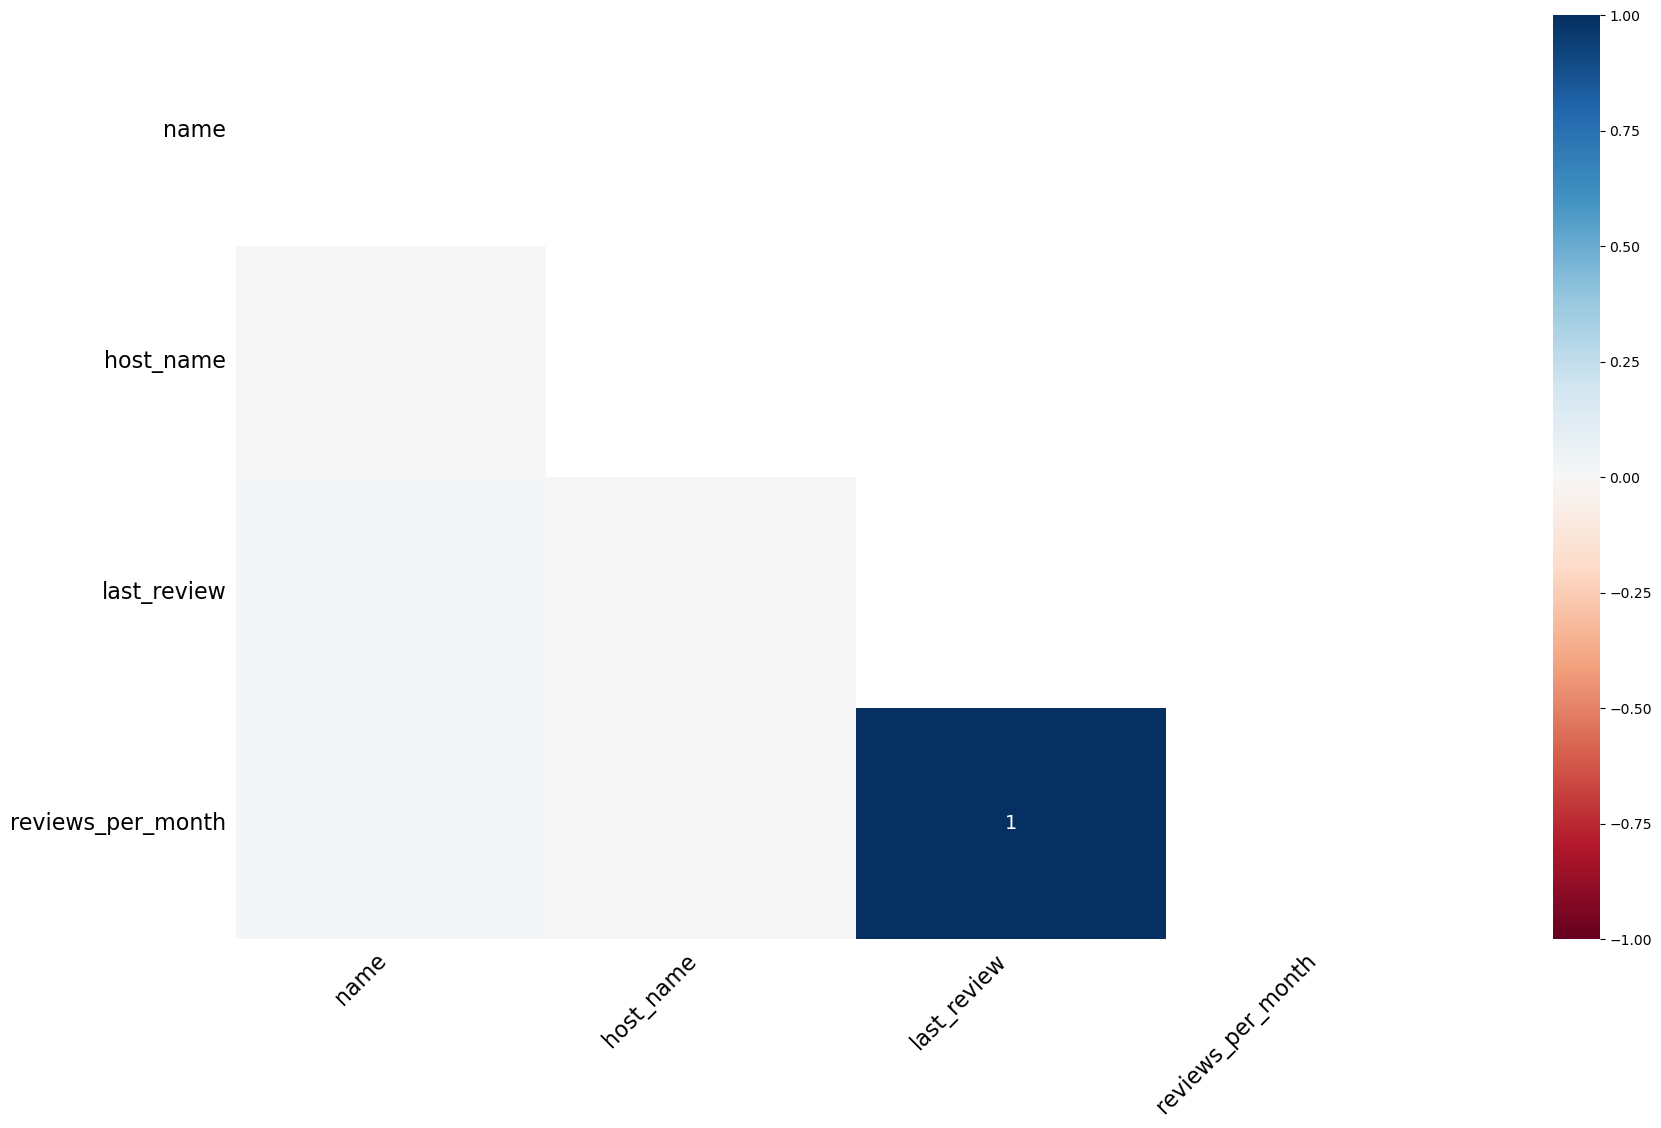

In [13]:
msno.heatmap(air_bnb)

Dari sini kita dapat mengetahui bahwa benar missing value pada `reviews_per_month` dan `last_review` memiliki hubungan yang sangat erat, ditunjukan dengan angka 1 pada Heatmap.

Setelah mengetahui bahwa `reviews_per_month` dan `last_review` memiliki hubungan yang sangat kuat, kita akan mencari tahu tentang tipe missing value dari 2 kolom tersebut.

<Axes: >

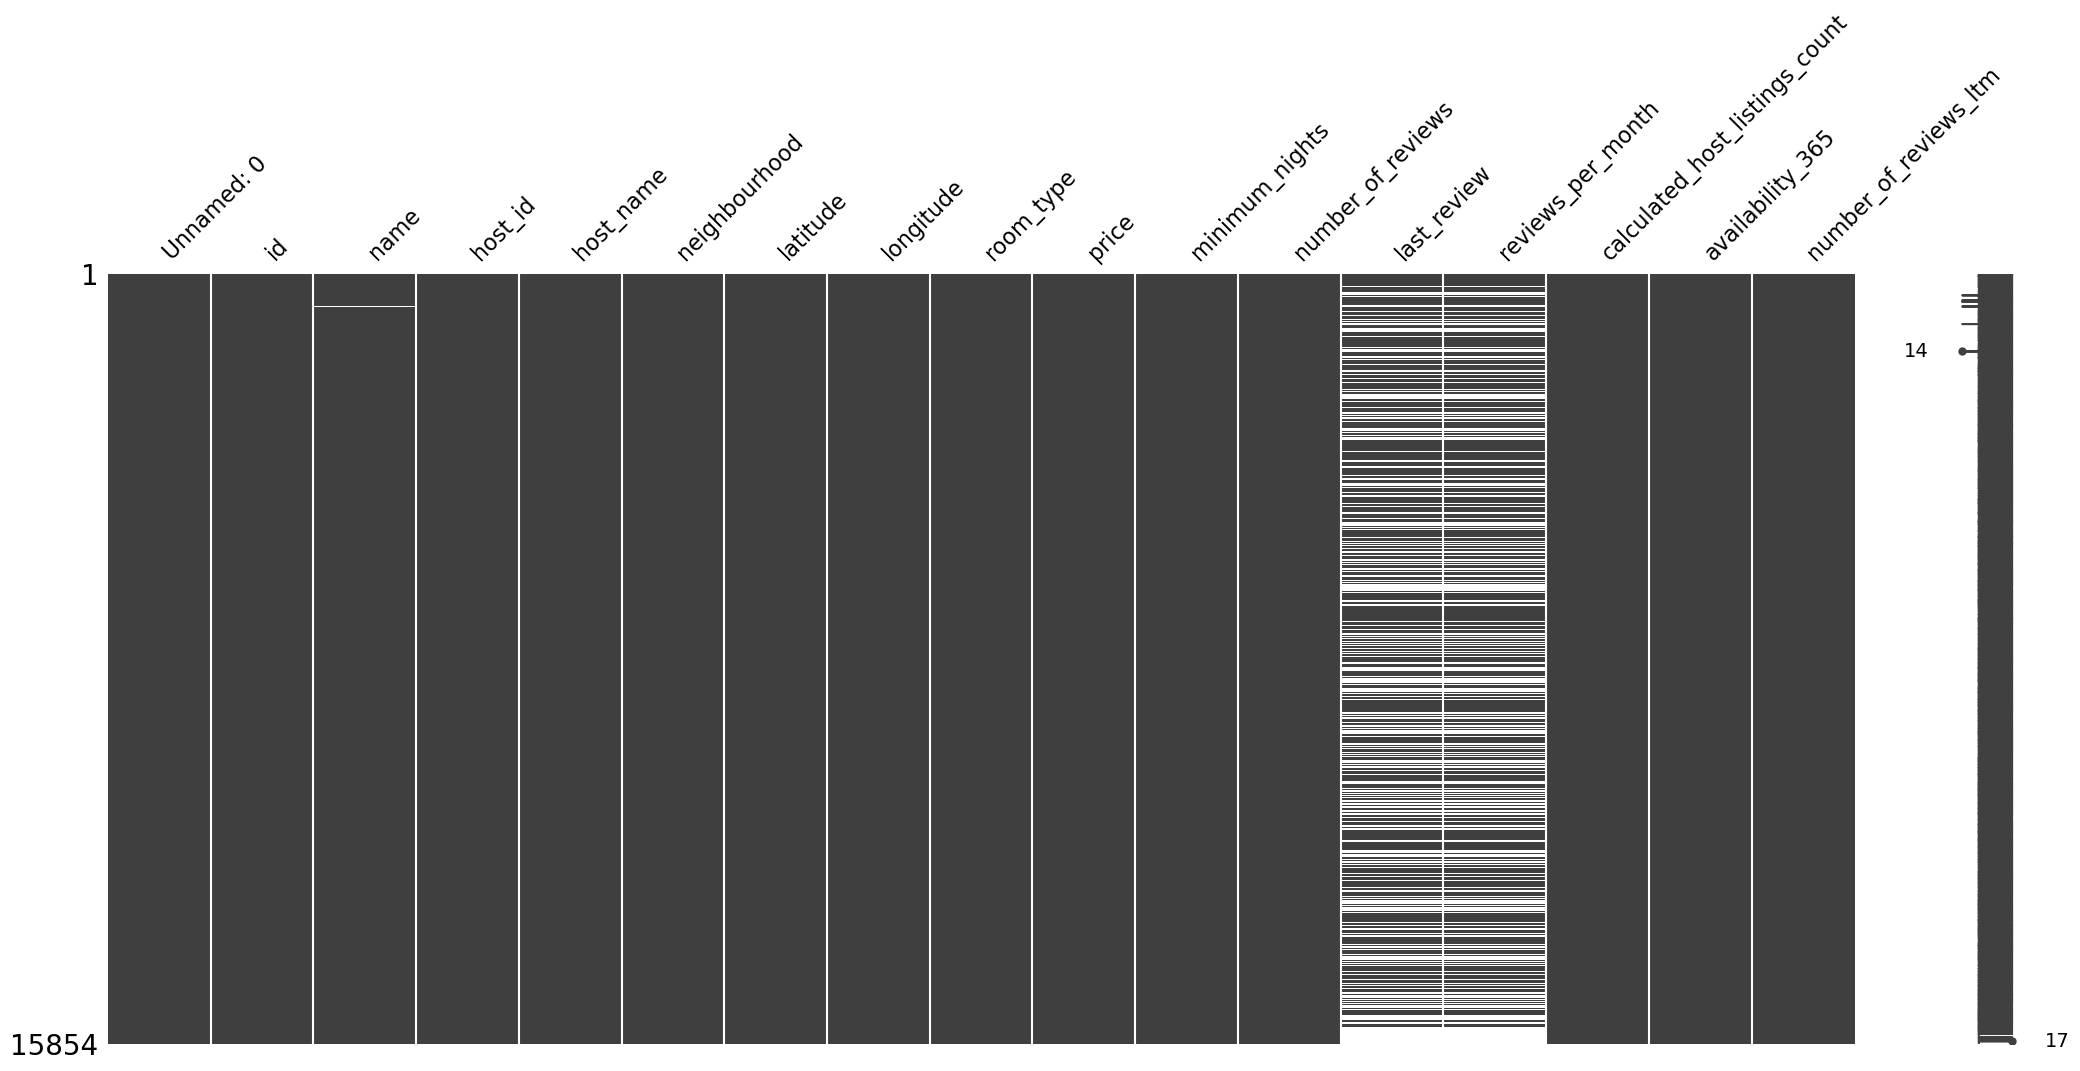

In [14]:
msno.matrix(air_bnb)

Disini kita mencoba melihat hubungan antara kolom dengan missing value dengan kolom lain tanpa missing value, dalam kasus ini kita coba dengan kolom `number_of_reviews`. Setelah kita coba urutkan kolom `number_of_reviews` maka semua missing value pada kolom `reviews_per_month` dan `last_review` berada pada nilai awal dari `number_of_reviews`.

<Axes: >

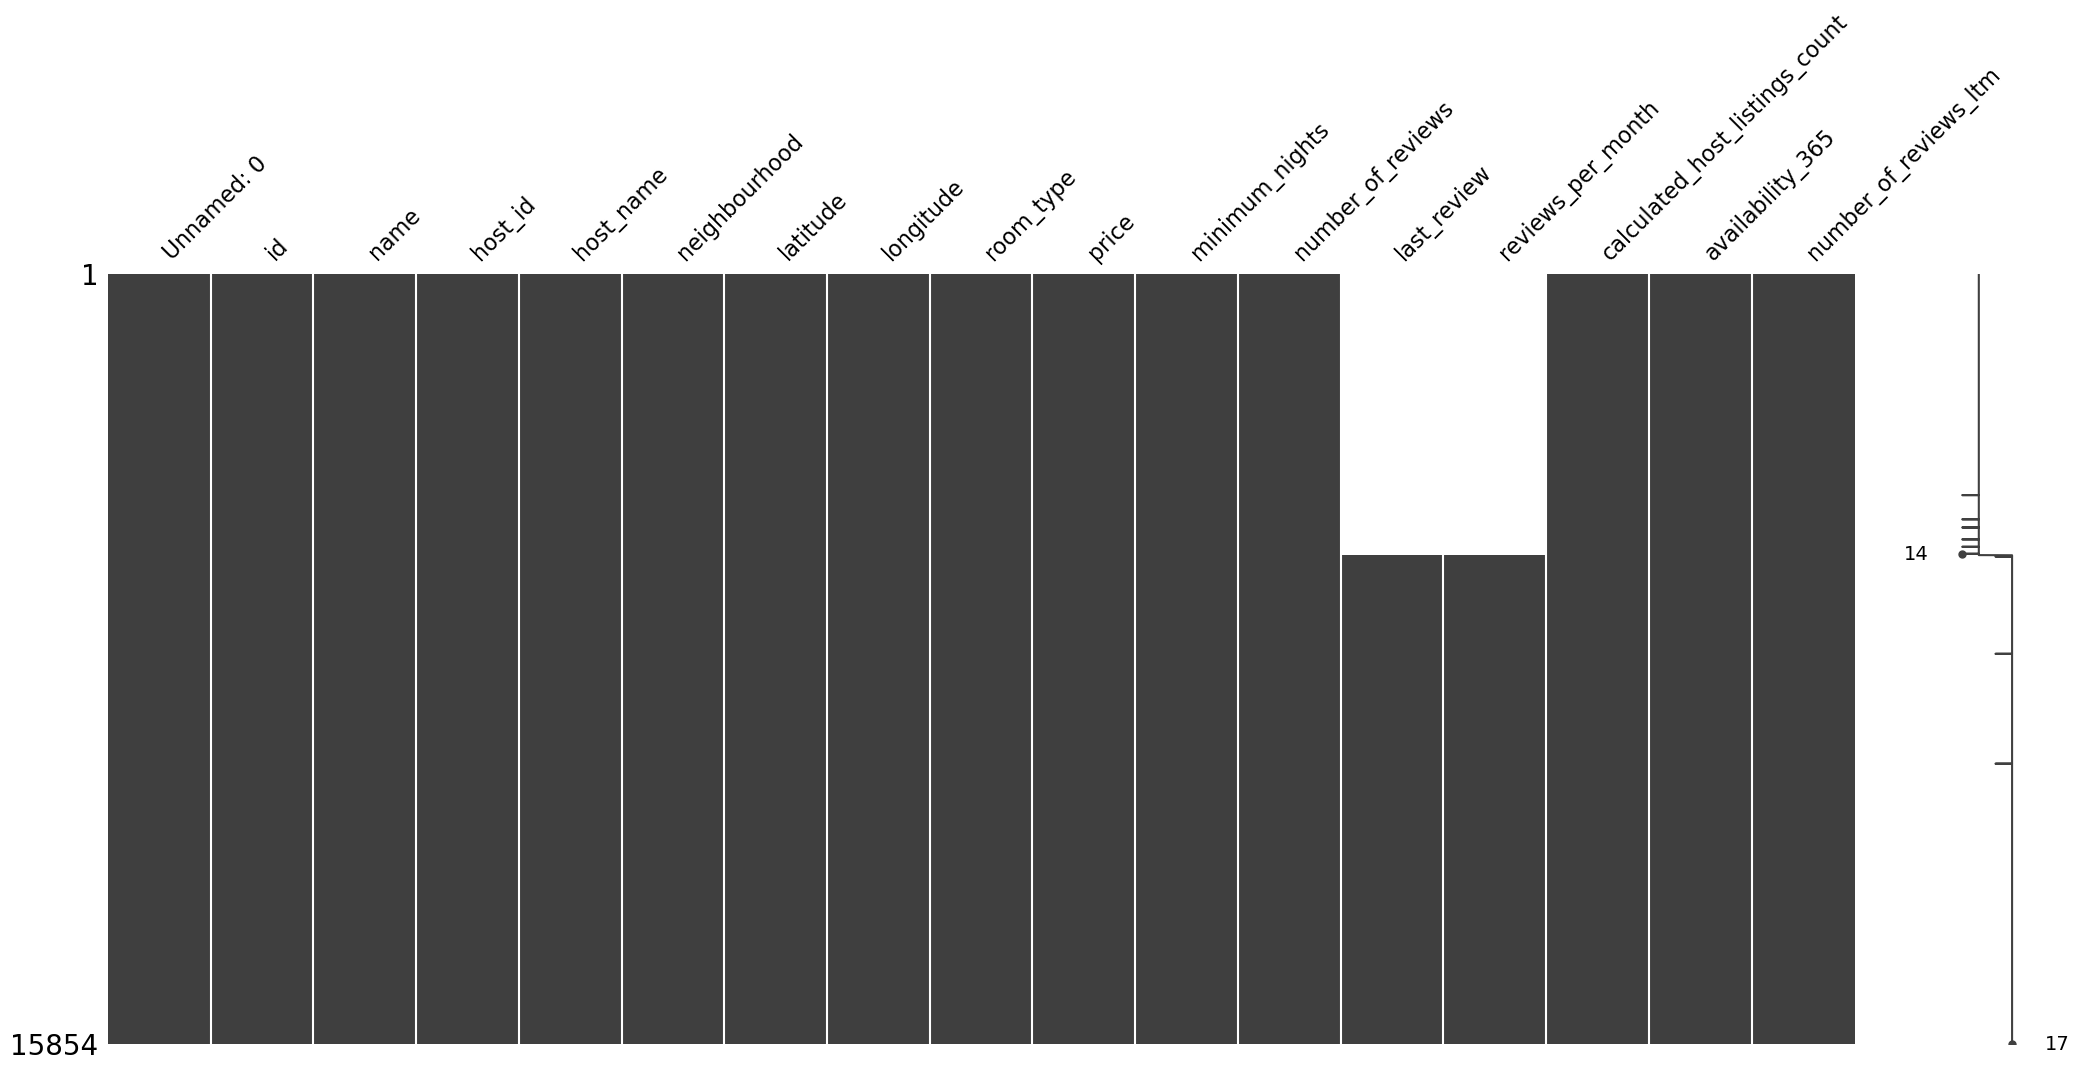

In [15]:
sorted = air_bnb.sort_values('number_of_reviews')
msno.matrix(sorted)

Untuk mendapatkan hasil yang lebih detail dari visualisasi tersebut, kita akan melakukan pengujian untuk mengetahui missing value pada `reviews_per_month` dan `last_review` terjadi pada nilai berapa di kolom `number_of_reviews`.

In [16]:
display(air_bnb[air_bnb['last_review'].isna()]['number_of_reviews'].value_counts(),
air_bnb[air_bnb['reviews_per_month'].isna()]['number_of_reviews'].value_counts())

number_of_reviews
0    5790
Name: count, dtype: int64

number_of_reviews
0    5790
Name: count, dtype: int64

Setelah kita lakukan pengujian ternyata benar bahwa missing value pada `reviews_per_month` dan `last_review` terjadi jika nilai pada kolom `number_of_reviews` adalah 0.

Melihat hasil tersebut kita dapat ambil kesimpulan bahwa tipe missing value dari 2 kolom ini adalah **MNAR (Missing Not At Random)**.

Dengan mengetahui bahwa tipe missing value dari 2 kolom itu adalah **MNAR** maka kita bisa mengisi missing value pada kedua kolom tersebut dengan nilai 0, mengisi dengan nilai 0 tidak akan mengganggu distribusi data yang ada dan kolom `reviews_per_month` dan `last_review` akan siap digunakan.

In [17]:
air_bnb['reviews_per_month'].fillna(0,inplace=True)
air_bnb['last_review'].fillna(0,inplace=True)

Setelah melakukan pengisian missing value pada kolom `reviews_per_month` dan `last_review`, kita lakukan pengecekan lagi untuk kolom lain yang masih memiliki missing value.

In [18]:
air_bnb.isna().sum()

Unnamed: 0                        0
id                                0
name                              8
host_id                           0
host_name                         1
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

Disini kita dapat melihat bahwa masih ada 8 missing values pada kolom `name` dan 1 missing value pada kolom `host_name`. Pada kolom ini tidak memungkinkan jika melakukan imputasi dengan menggunakan metode statistik yang ada, karena data yang ada pada kolom tersebut adalah nilai unik, dan jika dilihat bahwa persentase missing value dari kedua kolom itu hanya sebesar **0,05%** dan **0,006%** sehingga kita akan drop missing value dari kedua kolom tersebut.

In [19]:
air_bnb.dropna(subset=['name','host_name'], inplace=True)

Kita juga akan drop kolom `Unnamed: 0`

In [20]:
air_bnb.drop(columns=['Unnamed: 0'], inplace=True)

Setelah melakuan pengisian missing value, maka kita akan melakukan pengecekan apakah ada nilai yang tidak valid dari setiap kolom numerik pada dataset Airbnb

In [21]:
air_bnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.584500e+04,1.584500e+04,15845.000000,15845.000000,1.584500e+04,15845.000000,15845.000000,15845.000000,15845.000000,15845.000000,15845.000000
mean,1.580294e+17,1.541645e+08,13.745148,100.559895,3.218580e+03,15.299905,16.663048,0.516464,13.896813,244.319281,3.483496
std,2.946611e+17,1.318845e+08,0.043044,0.050915,2.497917e+04,50.828453,40.623125,0.952948,30.276935,125.849614,8.919083
min,2.793400e+04,5.892000e+04,13.527300,100.329550,0.000000e+00,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,2.104514e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,0.000000,1.000000,138.000000,0.000000
50%,3.505717e+07,1.224556e+08,13.738490,100.561400,1.429000e+03,1.000000,2.000000,0.090000,4.000000,309.000000,0.000000
75%,5.258780e+07,2.392258e+08,13.759490,100.585140,2.429000e+03,7.000000,13.000000,0.670000,13.000000,360.000000,3.000000
max,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


### **Handling Anomaly Data**

Disini terdapat data yang tidak valid yaitu pada kolom price terdapat nilai minimum sebesar 0. Kita akan melakukan pengecekan pada row yang memiliki nilai 0 lebih dulu

In [22]:
air_bnb[air_bnb['price']==0]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
11103,44563108,Somerset Maison Asoke Bangkok,360620448,Somerset Maison Asoke,Vadhana,13.73815,100.5642,Hotel room,0,1,0,0,0.0,1,0,0


In [23]:
air_bnb[air_bnb['price']==0].shape[0]

1

Kita dapat melihat bahwa data yang memiliki `price` dengan nilai 0 hanya 1 data, sehingga kita putuskan untuk drop keseluruhan row yang mengandung value 0 pada kolom `price` 

In [24]:
air_bnb=air_bnb[air_bnb['price']!=0]

Setelah melakukan pengecekan data anomali, maka kita akan melakukan pengecekan outlier dari kolom `price` dan `minimum_nights`

In [25]:
def annotate_bars(ax):
    for bar in ax.patches:
        x, y = bar.get_xy()
        ax.text(
            x + bar.get_width(), y + bar.get_height(), f'{int(bar.get_width()):,d} ',
            va='top', ha='center', color='black', rotation =90
        )
    return ax

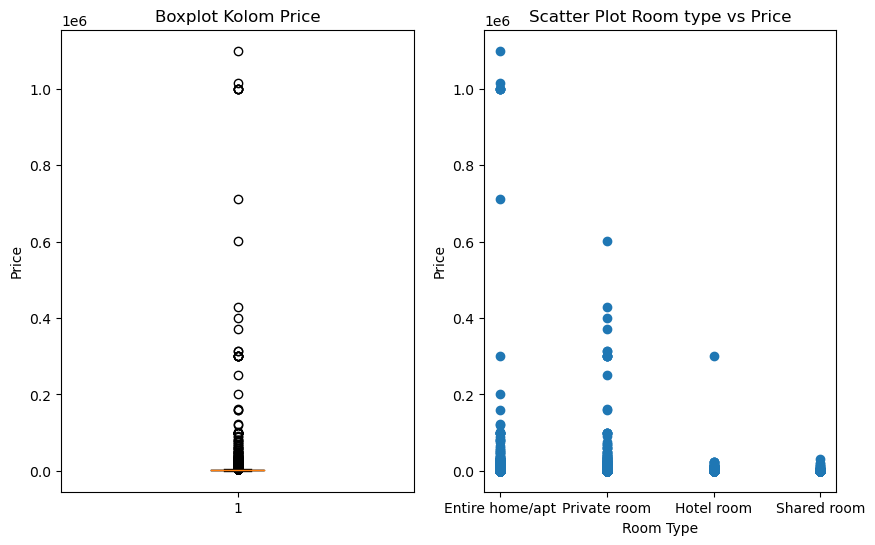

In [26]:
fig, axes = plt.subplots (1,2, figsize= (10,6))

axes[0].boxplot(air_bnb['price'])
axes[0].set_ylabel ('Price')
axes[0].set_title ('Boxplot Kolom Price')

axes[1].scatter (air_bnb['room_type'], air_bnb['price'])
axes[1].set_title ('Scatter Plot Room type vs Price')
axes[1].set_xlabel ('Room Type')
axes[1].set_ylabel ('Price')

plt.show()

Dari grafik diatas kita dapat melihat bahwa terdapat beberapa outlier pada kolom `price`, tapi untuk sementara akan kita pertahankan lebih dulu untuk dilakukan analisa lebih lanjut. 

In [27]:
air_bnb.to_csv('Airbnb_Dataset_Cleaning.csv', index=False)